INFOSYS_STOCK_MARKET_PRICE_PREDICTION

Importing the required Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [11]:
df = pd.read_csv("C:\\Users\\ckdshjadskkhdsl\\Downloads\\INFY.NS (1).csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-07-2015,494.500000,502.500000,493.000000,498.700012,415.561249,6880852.0
1,02-07-2015,499.500000,500.700012,492.524994,494.000000,411.644745,4007568.0
2,03-07-2015,494.000000,496.500000,491.000000,495.149994,412.603058,2695306.0
3,06-07-2015,492.500000,494.000000,487.500000,491.649994,409.686493,4305602.0
4,07-07-2015,492.500000,495.000000,489.500000,490.250000,408.519897,3497418.0
...,...,...,...,...,...,...,...
1223,23-06-2020,695.700012,724.500000,692.099976,720.650024,720.650024,12157390.0
1224,24-06-2020,716.900024,726.799988,709.400024,714.150024,714.150024,10220838.0
1225,25-06-2020,704.849976,705.599976,693.500000,700.500000,700.500000,14945284.0
1226,26-06-2020,710.200012,751.599976,710.000000,748.200012,748.200012,26030458.0


In [12]:
df.shape

(1228, 7)

In [13]:
df.describe

<bound method NDFrame.describe of             Date        Open        High         Low       Close   Adj Close  \
0     01-07-2015  494.500000  502.500000  493.000000  498.700012  415.561249   
1     02-07-2015  499.500000  500.700012  492.524994  494.000000  411.644745   
2     03-07-2015  494.000000  496.500000  491.000000  495.149994  412.603058   
3     06-07-2015  492.500000  494.000000  487.500000  491.649994  409.686493   
4     07-07-2015  492.500000  495.000000  489.500000  490.250000  408.519897   
...          ...         ...         ...         ...         ...         ...   
1223  23-06-2020  695.700012  724.500000  692.099976  720.650024  720.650024   
1224  24-06-2020  716.900024  726.799988  709.400024  714.150024  714.150024   
1225  25-06-2020  704.849976  705.599976  693.500000  700.500000  700.500000   
1226  26-06-2020  710.200012  751.599976  710.000000  748.200012  748.200012   
1227  29-06-2020  735.400024  744.700012  730.099976  731.750000  731.750000   

     

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1228 non-null   object 
 1   Open       1227 non-null   float64
 2   High       1227 non-null   float64
 3   Low        1227 non-null   float64
 4   Close      1227 non-null   float64
 5   Adj Close  1227 non-null   float64
 6   Volume     1227 non-null   float64
dtypes: float64(6), object(1)
memory usage: 67.3+ KB


In [31]:
# Convert Date to datetime and sort by time (important for time-series)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values('Date').reset_index(drop=True)


In [32]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Target       0
dtype: int64

In [33]:
df.isnull().sum().sum()

0

Drop rows with missing values

In [34]:

df = df.dropna().reset_index(drop=True)

In [35]:
# Create Target: next day's Close price
df['Target'] = df['Close'].shift(-1)

# Drop last row (Target is NaN there because no "next day")
df = df.iloc[:-1].reset_index(drop=True)

Define features

In [36]:

feature_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
target_col = 'Target'

X = df[feature_cols]
y = df[target_col]

Time-based train-test split (80% train, 20% test)

In [37]:

split_index = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

Scaling for linear and distance-based models

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
print("Train shape:", X_train.shape, " Test shape:", X_test.shape)
print("Features:", feature_cols)
print("Target column:", target_col)

Train shape: (980, 6)  Test shape: (245, 6)
Features: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
Target column: Target


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1225 non-null   datetime64[ns]
 1   Open       1225 non-null   float64       
 2   High       1225 non-null   float64       
 3   Low        1225 non-null   float64       
 4   Close      1225 non-null   float64       
 5   Adj Close  1225 non-null   float64       
 6   Volume     1225 non-null   float64       
 7   Target     1225 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 76.7 KB


In [41]:
print(df[feature_cols + [target_col]].describe())

              Open         High          Low        Close    Adj Close  \
count  1225.000000  1225.000000  1225.000000  1225.000000  1225.000000   
mean    605.168245   611.771899   598.320305   604.941612   557.119333   
std     103.956726   105.071648   103.034811   104.053331   118.210750   
min     440.000000   443.799988   430.000000   436.700012   390.604187   
25%     514.125000   519.549988   509.299988   513.849976   451.242340   
50%     585.000000   592.250000   579.549988   585.724976   517.021057   
75%     703.799988   711.650024   695.400024   703.950012   676.203369   
max     843.299988   847.000000   835.049988   840.150024   810.035217   

             Volume       Target  
count  1.225000e+03  1225.000000  
mean   8.661345e+06   605.145285  
std    7.932760e+06   104.089383  
min    7.589560e+05   436.700012  
25%    5.360622e+06   514.099976  
50%    7.016424e+06   585.950012  
75%    9.542656e+06   704.150024  
max    1.644050e+08   840.150024  


Plot 1: Close price over time

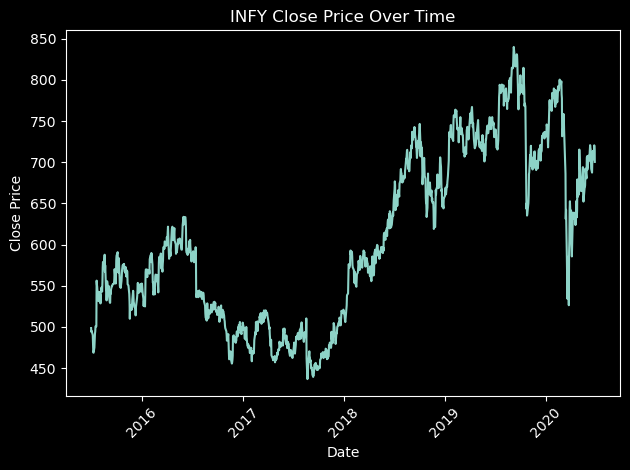

In [47]:
plt.figure()
plt.plot(df['Date'], df['Close'], label='Today Close')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("INFY Close Price Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Plot 2: Target (Next-day Close) over time

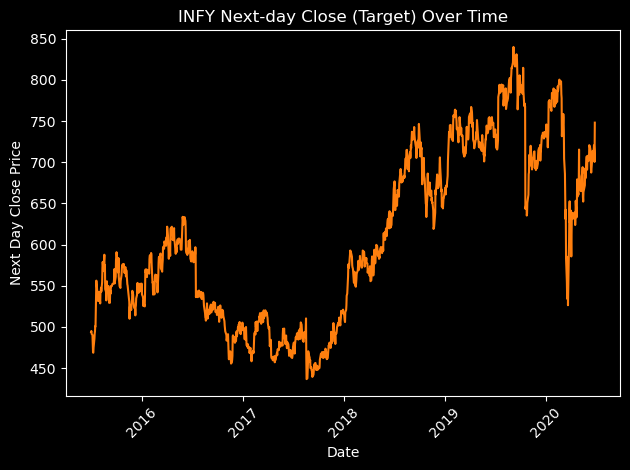

In [46]:
plt.figure()
plt.plot(df['Date'], df['Target'], label='Next Day Close', color='tab:orange')
plt.xlabel("Date")
plt.ylabel("Next Day Close Price")
plt.title("INFY Next-day Close (Target) Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Plot 3: Distribution of Close prices

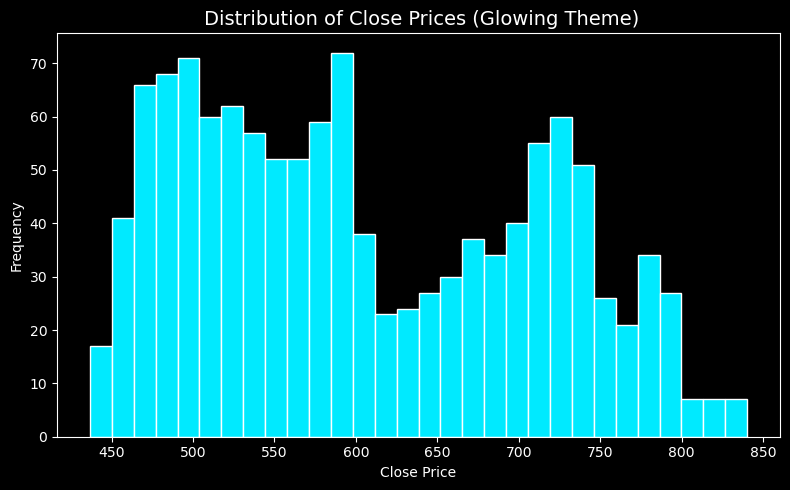

In [50]:
plt.style.use("dark_background")
plt.figure(figsize=(8,5))

plt.hist(df['Close'], bins=30, color="#00eaff", edgecolor="#ffffff")

plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.title(" Distribution of Close Prices (Glowing Theme)", fontsize=14)

plt.tight_layout()
plt.show()


Correlation heatmap between features and Target

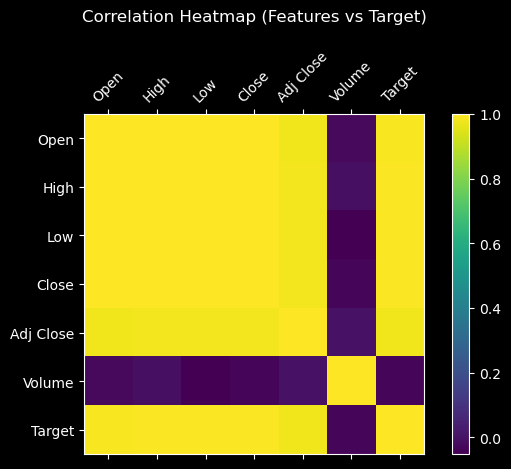

In [52]:
cols_for_corr = feature_cols + [target_col]
corr = df[cols_for_corr].corr()

fig, ax = plt.subplots()
cax = ax.matshow(corr.values)
fig.colorbar(cax)
ax.set_xticks(range(len(cols_for_corr)))
ax.set_yticks(range(len(cols_for_corr)))
ax.set_xticklabels(cols_for_corr, rotation=45)
ax.set_yticklabels(cols_for_corr)
plt.title("Correlation Heatmap (Features vs Target)", pad=20)
plt.tight_layout()
plt.show()